In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path
# Enable future behavior warning enforcement
pd.set_option('future.no_silent_downcasting', True)

# Objective: How many glasses, flights, and tastings were sold at both Ferry Market Wine Bar and Unionville Tasting Room
# YTD compared to the same date range in 2024, 2023, 2022, 2021

# Load the exported Unionville Vineyards order history from Shopify e-commerce platform
# orders_export_1 contains order numbers 138209 (6/30/25 21:05) - 112585 (9/7/23 17:48)
# orders_export_2 contains order numbers 112584 (9/7/23 17:10) - 85435 (10/8/21 18:39)
# orders_export_3 contains order numbers 85434 (10/8/21 18:30) - 59033 (2/9/20 18:35)
# orders_export_4 contains order numbers 59032 (2/9/20 18:13) - 30933 (9/15/18 14:14)
# orders_export_5 contains order numbers 30932 (9/15/18 14:04) - #1-1655 (9/28/14 15:47)
# orders_export_6 contains order numbers #1-1654 (9/28/14 15:44) - #1-1001 (5/1/14 16:36)

orders_export_1 = Path('Resources/orders_export_1.csv')
orders_export_2 = Path('Resources/orders_export_2.csv')
orders_export_3 = Path('Resources/orders_export_3.csv')

# Below csv files not needed
# orders_export_4 = Path('Resources/orders_export_4.csv')
# orders_export_5 = Path('Resources/orders_export_5.csv')
# orders_export_6 = Path('Resources/orders_export_6.csv')

In [2]:
# Read in Files to Load
# Used df.info() to see which DataFrame column number Pandas is referring to when giving the mixed dtypes error.

# Used 'dtype' parameter in pd.read_csv. Specify data types when dealing with columns
# containing mixed data, or when we want to optimize memory usage for specific columns.
# In this case, we are dealing with columns of mixed data.

# Columns (27,28,30,33,37,38,40,44,56,66,68,76) have mixed types. Specify dtype option on import or set low_memory=False.
# 27  Billing Address2             133 non-null    object 
# 28  Billing Company              74 non-null     object 
# 30  Billing Zip                  2644 non-null   object 
# 33  Billing Phone                2085 non-null   object 
# 37  Shipping Address2            80 non-null     object 
# 38  Shipping Company             87 non-null     object 
# 40  Shipping Zip                 1819 non-null   object 
# 44  Notes                        45 non-null     object 
# 56  Tags                         1598 non-null   object 
# 66  Tax 4 Name                   3 non-null      object 
# 68  Tax 5 Name                   2 non-null      object 
# 76  Payment Terms Name           60 non-null     object 

a_dtype_dict = {
    'Billing Address2': object,
    'Billing Company': object,
    'Billing Zip': object,
    'Billing Phone': object,
    'Shipping Address2': object,
    'Shipping Company': object,
    'Shipping Zip': object,
    'Notes': object,
    'Tags': object,
    'Tax 4 Name': object,
    'Tax 5 Name': object,
    'Payment Terms Name': object
}
a_df = pd.read_csv(orders_export_1, dtype = a_dtype_dict)

# b_df
# Columns (28,30,37,38,40,44,45,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
# 28  Billing Company              55 non-null     object 
# 30  Billing Zip                  2476 non-null   object 
# 37  Shipping Address2            153 non-null    object 
# 38  Shipping Company             89 non-null     object 
# 40  Shipping Zip                 2056 non-null   object  
# 44  Notes                        88 non-null     object 
# 45  Note Attributes              6 non-null      object 
# 62  Tax 2 Name                   85 non-null     object 
# 64  Tax 3 Name                   51 non-null     object

b_dtype_dict = {
    'Billing Company': object, 
    'Billing Zip': object,
    'Shipping Address2': object,
    'Shipping Company': object,
    'Shipping Zip': object,
    'Notes': object,
    'Note Attributes': object,
    'Tax 2 Name': object,
    'Tax 3 Name': object
}
b_df = pd.read_csv(orders_export_2, dtype = b_dtype_dict)

# c_df
# Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
# 45  Note Attributes              6 non-null      object 
# 46  Cancelled at                 2 non-null      object

c_dtype_dict = {
    'Note Attributes': object,
    'Cancelled at': object
}
c_df = pd.read_csv(orders_export_3, dtype = c_dtype_dict)

# d_df
# Columns (40,45,64) have mixed types. Specify dtype option on import or set low_memory=False.
# 40  Shipping Zip                 2175 non-null   object 
# 45  Note Attributes              94 non-null     object 
# 64  Tax 3 Name                   60 non-null     object

# d_dtype_dict = {
#     'Shipping Zip': object,
#     'Note Attributes': object,
#     'Tax 3 Name': object
# }
# d_df = pd.read_csv(orders_export_4, dtype = d_dtype_dict)

# e_df
# Columns (40,45,46,56,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
# 40  Shipping Zip                 865 non-null    object 
# 45  Note Attributes              2 non-null      object 
# 46  Cancelled at                 4 non-null      object 
# 56  Tags                         404 non-null    object 
# 62  Tax 2 Name                   17 non-null     object 
# 64  Tax 3 Name                   4 non-null      object

# e_dtype_dict = {
#     'Shipping Zip': object,
#     'Note Attributes': object,
#     'Cancelled at': object,
#     'Tags': object,
#     'Tax 2 Name': object,
#     'Tax 3 Name': object
# }
# e_df = pd.read_csv(orders_export_5, dtype = e_dtype_dict)

# f_df = pd.read_csv(orders_export_6)

In [3]:
# a_df.info()
# for i, col in enumerate(a_df.columns):
#     print(f"{i}: {col}")

In [4]:
# Concatenate into single DataFrame

UV_Order_History_df = pd.concat([a_df, b_df, c_df], axis=0)

In [5]:
UV_Order_History_df.to_csv('Output_Files/UV_Order_History_Raw.csv', index=False)

In [6]:
# Count number of columns
print(f"Number of columns: {len(UV_Order_History_df.columns)}")

Number of columns: 79


In [7]:
# Select columns of interest while using the .rename() method to rename column labels

UV_Order_History_df = UV_Order_History_df[
['Name', 'Paid at', 'Fulfilled at',  'Subtotal', 'Shipping', 'Taxes', 'Total',
 'Discount Code', 'Discount Amount', 'Lineitem quantity',
 'Lineitem name', 'Lineitem price', 'Lineitem sku', 'Location',
 'Device ID', 'Lineitem discount', 'Tax 1 Name', 'Tax 1 Value',
 'Tax 2 Name', 'Tax 2 Value']
].rename(columns={
    'Name': 'Order Number', 'Paid at': 'Paid At', 'Fulfilled at': 'Fulfilled At', 'Lineitem quantity': 'Item Qty',
    'Lineitem name': 'Item Name', 'Lineitem price': 'Item Price',
    'Lineitem sku': 'Item SKU', 'Lineitem discount': 'Item Discount'})

UV_Order_History_df

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,Item Name,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
0,#138209,6/30/25 21:05,NaN,49.95,0.0,3.31,53.26,NaN,0.00,1,2022 Sourland Ridge Red,49.95,NaN,NaN,NaN,0.0,New Jersey State Tax 6.625%,3.31,NaN,NaN
1,#138208,6/30/25 16:32,6/30/25 16:32,67.95,0.0,4.50,72.45,NaN,0.00,1,2022 Pheasant Hill Pinot Noir,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Wine Tastings - NJ Flight / 90 m,18.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,6/30/25 16:03,6/30/25 16:03,85.41,0.0,5.31,90.72,Wedding,9.49,1,2023 Silver Lining Cabernet Franc,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2022 Estate Blush,19.95,PINK:FOF,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44053,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2017 Pinot Noir,29.95,RED:Pinot Noir 2017,NaN,NaN,0.0,NaN,NaN,NaN,NaN
44054,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Vat #25 Port Wine,33.95,RED:Vat 25,NaN,NaN,0.0,NaN,NaN,NaN,NaN
44055,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016 MRV Chardonnay,34.95,WH:MR Chardonnay 2016,NaN,NaN,0.0,NaN,NaN,NaN,NaN
44056,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2017 Hunterdon Mistral Blanc,26.95,WH:Mistral Blanc 2017,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [8]:
# Recount numbers of columns
# Print number of columns in use, and print in list form
col_to_list = UV_Order_History_df.columns.tolist()

print(f"Number of columns: {len(UV_Order_History_df.columns.tolist())}")
print(col_to_list)

Number of columns: 20
['Order Number', 'Paid At', 'Fulfilled At', 'Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Item Qty', 'Item Name', 'Item Price', 'Item SKU', 'Location', 'Device ID', 'Item Discount', 'Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name', 'Tax 2 Value']


In [9]:
# Count number of rows where 'Location' is NaN
UV_Order_History_df['Location'].isna().sum()

55652

In [10]:
# Propogate `Location` value across all rows that share the same `Order Number`, so we know for certain which location sold
# which item

# Using both ffill().bfill() ensures that regardless of where the non-null value is within the group (top, middle, or bottom),
# all NaN values in that group will be filled.

UV_Order_History_df['Location'] = UV_Order_History_df.groupby('Order Number')['Location'].transform(lambda x: x.ffill().bfill())
# UV_Order_History_df = UV_Order_History_df.infer_objects(copy=False)

# UV_Order_History_df

In [11]:
# Recount the number of rows where 'Location' is NaN
UV_Order_History_df['Location'].isna().sum()

9266

In [12]:
# Sort 'Item Name' column values in alphabetical order
sorted_items = sorted(UV_Order_History_df['Item Name'].unique())

In [13]:
# Identify all flight related Item Names

flight_items = [item for item in sorted_items if 'flight' in item.lower()]
# verbose version:
# flight_items = []
# for item in sorted_items:
#         if 'flight' in item.lower():
#             flight_items.append(item)

flight_items

['Flights & Bites - Cheese',
 'Flights & Bites - Sweets',
 'Wine Tastings - Flight / 90 m',
 'Wine Tastings - NJ Flight / 90 m',
 'Wine Tastings - PA Flight / 90 m']

In [14]:
# Identify all glass of wine related Item Names

glass_items = [item for item in sorted_items if 'glass' in item.lower()]
# verbose version:
# glass_items = []
# for item in sorted_items:
#         if 'glass' in item.lower():
#             glass_items.append(item)
glass_items

['Event Wine Glass',
 'Glass',
 'Glass deposit',
 'Glass of Wine - Glass of Wine - $14',
 'Glass of Wine - Glass of Wine - $15',
 'Glass of Wine - Glass of Wine - $8',
 'Glass of Wine - Glass of Wine- $10',
 'Glass of Wine - Glass of Wine- $11',
 'Glass of Wine - Glass of Wine- $12',
 'Glass of Wine - Glass of Wine- $9',
 'Glass of Wine - Glass of Wine-$8',
 'Glass of Wine - Glass of Wine-7',
 'Glasses 2 LARFLF',
 'Half glass',
 'Large glass',
 'Small glasses',
 'UV Logo Etched Wine Glass',
 'UV Logo Etched Wine Glass (Pair)']

In [15]:
# Identify all wine tasting related Item Name

tasting_items = [item for item in sorted_items if 'tasting' in item.lower()]
# verbose version:
# tasting_items = []
# for item in sorted_items:
#         if 'tasting' in item.lower():
#             tasting_items.append(item)
tasting_items

['$10 Reserve Tasting',
 '$5 Tasting',
 '8+ group tasting fee',
 'Additional tastings',
 'Barrel Tasting',
 'Comp Tasting',
 'Fire Place - Tasting / 90 m',
 'Grand Tasting',
 'Group Tasting',
 'Group Tasting Fee',
 'Javanni Tasting',
 'Library Tasting - 12:30PM',
 'Library Tasting - 2:00PM',
 'Library Tasting - 3:30PM',
 'Library Tasting - Saturday 11:30am',
 'Library Tasting - Saturday 1:15pm',
 'Library Tasting - Saturday 3pm',
 'Library Tasting - Sunday 11:30am',
 'Library Tasting - Sunday 1:15pm',
 'Library Tasting - Sunday 3pm',
 'Private Tour and Tasting',
 'Tasting',
 'Tasting  valentine member',
 'Tasting Tour',
 'Tasting Tours',
 'Tasting Tours - August 11th at 5:30 pm',
 'Tasting Tours - August 6th at 11:30 am',
 'Tasting Tours - GIFT - To be booked in 2023',
 'Tasting Tours - Gift - To be booked in 2023',
 'Tasting Tours - November 27 at 11:30 am',
 'Tasting Tours - October 22nd at 11:30 am',
 'Tasting Tours - October 8th at 11:30 am',
 'Tasting Tours - Saturday August 12th'

In [16]:
# Normalize all names to lowercase for consistent comparison
flights_set = set([
    'Wine Tastings - Flight / 90 m',
    'Wine Tastings - NJ Flight / 90 m',
    'wine tastings - PA Flight / 90 m',
])

glasses_set = set([
    'Glass of Wine - Glass of Wine - $14',
    'Glass of Wine - Glass of Wine - $15',
    'Glass of Wine - Glass of Wine - $8',
    'Glass of Wine - Glass of Wine- $10',
    'Glass of Wine - Glass of Wine- $11',
    'Glass of Wine - Glass of Wine- $12',
    'Glass of Wine - Glass of Wine- $9',
    'Glass of Wine - Glass of Wine-$8',
    'Glass of Wine - Glass of Wine-7'
])

tastings_set = set([
    '$10 Reserve Tasting',
    '$5 Tasting',
    '8+ group tasting fee',
    'Additional tastings',
    'Comp Tasting',
    'Group Tasting',
    'Group Tasting Fee',
    'Tasting',
    'Wine Tasting - 90 m',
    'Wine Tasting - 90 minutes',
    'Wine Tastings - BB Tasting / 90m',
    'Wine Tastings - Group Tasting / 90 m',
    'Wine Tastings - PA Tasting',
    'Wine Tastings - PA Tasting / 90 m',
    'Wine Tastings - Tasting $10',
    'Wine Tastings - Tasting / 90 m',
    ])

In [17]:
# Handles non-string items by converting everything to str first.
# Useful if tastings_set contained non-str types.

flights_set = set(map(lambda x: str(x).strip().lower(), flights_set))
glasses_set = set(map(lambda x: str(x).strip().lower(), glasses_set))
tastings_set = set(map(lambda x: str(x).strip().lower(), tastings_set))

# Alternate approach if we know all items are strings
# flights_set = {s.lower().strip() for s in flights_set}
# glasses_set = {s.lower().strip() for s in glasses_set}
# tastings_set = {s.lower().strip() for s in tastings_set}

In [18]:
flights_set

{'wine tastings - flight / 90 m',
 'wine tastings - nj flight / 90 m',
 'wine tastings - pa flight / 90 m'}

In [19]:
glasses_set

{'glass of wine - glass of wine - $14',
 'glass of wine - glass of wine - $15',
 'glass of wine - glass of wine - $8',
 'glass of wine - glass of wine- $10',
 'glass of wine - glass of wine- $11',
 'glass of wine - glass of wine- $12',
 'glass of wine - glass of wine- $9',
 'glass of wine - glass of wine-$8',
 'glass of wine - glass of wine-7'}

In [20]:
tastings_set

{'$10 reserve tasting',
 '$5 tasting',
 '8+ group tasting fee',
 'additional tastings',
 'comp tasting',
 'group tasting',
 'group tasting fee',
 'tasting',
 'wine tasting - 90 m',
 'wine tasting - 90 minutes',
 'wine tastings - bb tasting / 90m',
 'wine tastings - group tasting / 90 m',
 'wine tastings - pa tasting',
 'wine tastings - pa tasting / 90 m',
 'wine tastings - tasting $10',
 'wine tastings - tasting / 90 m'}

In [21]:
# Normalize 'Item Name' using .strip().lower() and check if it's in one of the sets
import numpy as np
def categorize_item(name):
    name_normalized = str(name).strip().lower()
    if name_normalized in flights_set:
        return 'Flight'
    elif name_normalized in glasses_set:
        return 'Glass'
    elif name_normalized in tastings_set:
        return 'Tasting'
    else:
        return np.nan
        
UV_Order_History_df['Item Category'] = UV_Order_History_df['Item Name'].apply(categorize_item)

In [22]:
# Redefine the DataFrame with the added 'Item Category' column
UV_Order_History_df = UV_Order_History_df[[
    'Order Number', 'Paid At', 'Fulfilled At', 'Subtotal', 'Shipping', 'Taxes', 'Total', 'Discount Code',
    'Discount Amount', 'Item Qty', 'Item Name', 'Item Category', 'Item Price', 'Item SKU', 'Location',
    'Device ID', 'Item Discount', 'Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name', 'Tax 2 Value']]
UV_Order_History_df

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
0,#138209,6/30/25 21:05,NaN,49.95,0.0,3.31,53.26,NaN,0.00,1,...,NaN,49.95,NaN,NaN,NaN,0.0,New Jersey State Tax 6.625%,3.31,NaN,NaN
1,#138208,6/30/25 16:32,6/30/25 16:32,67.95,0.0,4.50,72.45,NaN,0.00,1,...,NaN,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,6/30/25 16:03,6/30/25 16:03,85.41,0.0,5.31,90.72,Wedding,9.49,1,...,NaN,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,19.95,PINK:FOF,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44053,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,29.95,RED:Pinot Noir 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44054,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,33.95,RED:Vat 25,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44055,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,34.95,WH:MR Chardonnay 2016,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44056,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,26.95,WH:Mistral Blanc 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN


In [23]:
#Check that rows correctly populate for Item Category of 'Flight'
UV_Order_History_df.loc[(UV_Order_History_df['Item Category'] == 'Flight')]

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
2,#138208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Flight,18.0,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
5,#138207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Flight,18.0,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
8,#138206,6/30/25 15:55,6/30/25 15:55,18.0,0.0,1.19,19.19,NaN,0.0,1,...,Flight,18.0,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,1.19,NaN,NaN
76,#138180,6/29/25 16:33,6/29/25 16:33,53.0,0.0,3.51,56.51,NaN,0.0,1,...,Flight,18.0,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,3.51,NaN,NaN
84,#138174,6/29/25 15:51,6/29/25 15:51,54.0,0.0,3.58,57.58,NaN,0.0,3,...,Flight,18.0,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,3.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18987,#73897,2021-02-20 15:35:30 -0500,2021-02-20 15:35:29 -0500,22.0,0.0,1.32,23.32,NaN,0.0,1,...,Flight,22.0,Tasting-10,Ferry Market,10.0,0.0,PA State Tax 6%,1.32,NaN,NaN
18990,#73894,2021-02-20 15:25:47 -0500,2021-02-20 15:25:47 -0500,22.0,0.0,1.32,23.32,NaN,0.0,1,...,Flight,22.0,Tasting-10,Ferry Market,10.0,0.0,PA State Tax 6%,1.32,NaN,NaN
19071,#73856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Flight,22.0,Tasting-10,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
19077,#73853,2021-02-20 13:22:14 -0500,2021-02-20 13:22:14 -0500,44.0,0.0,2.64,46.64,NaN,0.0,2,...,Flight,22.0,Tasting-10,Ferry Market,10.0,0.0,PA State Tax 6%,2.64,NaN,NaN


In [24]:
#Check that rows correctly populate for Item Category of 'Tasting'
UV_Order_History_df.loc[(UV_Order_History_df['Item Category'] == 'Tasting')]

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
25,#138201,6/30/25 13:00,6/30/25 13:00,119.90,0.0,7.95,127.85,NaN,0.0,2,...,Tasting,22.00,Tasting-10,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,7.95,NaN,NaN
65,#138185,6/29/25 16:53,6/29/25 16:53,187.80,0.0,12.46,200.26,NaN,0.0,2,...,Tasting,22.00,Tasting-10,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,12.46,NaN,NaN
111,#138161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Tasting,22.00,Tasting-10,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
112,#138160,6/29/25 14:05,6/29/25 14:05,83.90,0.0,5.56,89.46,NaN,0.0,2,...,Tasting,22.00,Tasting-10,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.56,NaN,NaN
134,#138154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Tasting,22.00,Tasting-10,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43994,#59063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Tasting,0.00,Classic Comp,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44001,#59059,2020-02-14 12:34:59 -0500,2020-02-14 12:34:58 -0500,198.65,0.0,11.92,210.57,NaN,0.0,2,...,Tasting,0.00,Classic Comp,Ferry Market,10.0,0.0,PA State Tax 6%,11.92,NaN,NaN
44013,#59056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Tasting,9.38,Tasting-10,Tasting Room,NaN,0.0,NaN,NaN,NaN,NaN
44014,#59055,2020-02-13 15:47:37 -0500,2020-02-13 15:47:37 -0500,82.66,0.0,5.48,88.14,NaN,0.0,2,...,Tasting,9.38,Tasting-10,Tasting Room,17.0,0.0,NJ State Tax 6.625%,5.48,NaN,NaN


In [25]:
# UV_Order_History_df.to_csv('Output_Files/Function_Categorize_Item_Applied.csv', index=False)

In [26]:
# Check for how many wine flights sold but Location column might still be blank

flights_blank_location = UV_Order_History_df.loc[
    (UV_Order_History_df['Location'].isna()) &
    (UV_Order_History_df['Item Name'].str.lower().str.strip().isin(flights_set))]
flights_blank_location

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value


In [27]:
# Check for how many glasses of wine sold but Location column might still be blank

glasses_blank_location = UV_Order_History_df.loc[
    (UV_Order_History_df['Location'].isna()) &
    (UV_Order_History_df['Item Name'].str.lower().str.strip().isin(glasses_set))]
glasses_blank_location

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
34475,#116774,12/27/23 16:05,12/27/23 16:10,1260.0,15.0,84.47,1359.47,Reduces price per glass to $7,360.0,180,...,Glass,9.0,Glass of Wine-9,NaN,NaN,0.0,New Jersey State Tax 6.625%,84.47,NaN,NaN


In [28]:
# Check for how many wine tastings were sold but the location column is still blank

tastings_blank_location = UV_Order_History_df.loc[
    (UV_Order_History_df['Location'].isna()) &
    (UV_Order_History_df['Item Name'].str.lower().str.strip().isin(tastings_set))]
tastings_blank_location

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
921,#137725,6/19/25 14:15,NaN,100.0,0.0,0.00,100.00,NaN,0.0,4,...,Tasting,25.0,Tasting-10:Group Tasting,NaN,NaN,0.0,New Jersey State Tax 6.625%,0.00,NaN,NaN
7826,#133519,3/19/25 16:15,NaN,100.0,0.0,0.00,100.00,NaN,0.0,4,...,Tasting,25.0,Tasting-10:Group Tasting,NaN,NaN,0.0,New Jersey State Tax 6.625%,0.00,NaN,NaN
17516,#127300,10/16/24 12:18,NaN,250.0,0.0,0.00,250.00,NaN,0.0,10,...,Tasting,25.0,Tasting-10:Group Tasting,NaN,NaN,0.0,Pennsylvania State Tax 6%,0.00,NaN,NaN
22212,#124260,8/12/24 14:09,NaN,75.0,0.0,0.00,75.00,NaN,0.0,3,...,Tasting,25.0,Tasting-10:Group Tasting,NaN,NaN,0.0,New Jersey State Tax 6.625%,0.00,NaN,NaN
22568,#124068,8/6/24 14:50,NaN,150.0,0.0,0.00,150.00,NaN,0.0,6,...,Tasting,25.0,Tasting-10:Group Tasting,NaN,NaN,0.0,Pennsylvania State Tax 6%,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38628,#62056,2020-06-09 15:48:31 -0400,NaN,16.0,0.0,1.06,17.06,NaN,0.0,1,...,Tasting,16.0,TastingReservation,NaN,NaN,0.0,NJ State Tax 6.625%,1.06,NaN,NaN
38632,#62054,NaN,NaN,0.0,0.0,0.00,0.00,CLUBTASTING,16.0,1,...,Tasting,16.0,TastingReservation,NaN,NaN,0.0,NJ State Tax 6.625%,0.00,NaN,NaN
38633,#62053,NaN,NaN,0.0,0.0,0.00,0.00,CLUBTASTING,16.0,1,...,Tasting,16.0,TastingReservation,NaN,NaN,0.0,NJ State Tax 6.625%,0.00,NaN,NaN
39124,#61738,2020-05-26 16:14:41 -0400,NaN,16.0,0.0,1.06,17.06,NaN,0.0,1,...,Tasting,16.0,TastingReservation,NaN,NaN,0.0,NJ State Tax 6.625%,1.06,NaN,NaN


In [29]:
# Get the effective number of rows from above cell by retrieving the .shape attribute 
count = UV_Order_History_df.loc[
    (UV_Order_History_df['Location'].isna()) &
    (UV_Order_History_df['Item Name'].str.lower().str.strip().isin(tastings_set))].shape[0]

print(f"Number of rows: {count}")

Number of rows: 219


In [30]:
# Sort 'Tax 1 Name' column in alphabetical order
# Since NaN values are present, sorted() will raise an error "TypeError: '<' not supported between instances of 'float' and 'str'"
# Therefore, include 'if' statement to handle NaN values

Tax1Name_sorted = sorted(
    [x for x in UV_Order_History_df['Tax 1 Name'].unique() if pd.notna(x)]
)
Tax1Name_sorted

['Alachua County Tax 1.5%',
 'Arizona State Tax 0%',
 'Arlington Co Sp 0.7%',
 'Astoria Municipal Tax 4.5%',
 'Bedminster City Tax 0%',
 'Bergen County Tax 0%',
 'Bordentown Township City Tax 0%',
 'Branchburg City Tax 0%',
 'Bridgewater City Tax 0%',
 'Bronx County Tax 0.375%',
 'Bronxville Municipal Tax 3%',
 'Brooklyn Municipal Tax 4.5%',
 'Broome County Tax 4%',
 'Broward County Tax 1%',
 'Burlington County Tax 0%',
 'CA State Tax 7.25%',
 'CT State Tax 6.35%',
 'California State Tax 6%',
 'Collier County Tax 1%',
 'Colorado State Tax 0%',
 'Columbia County Tax 4%',
 'Connecticut State Tax 6.35%',
 'Corona Municipal Tax 4.5%',
 'Delaware State Tax 0%',
 'District of Columbia State Tax 0%',
 'Dutchess Co Transit District 0.375%',
 'Duval County Tax 1%',
 'Duval County Tax 1.5%',
 'East Amwell Township City Tax 0%',
 'East Elmhurst Municipal Tax 4.5%',
 'Essex County Tax 0%',
 'FL State Tax 6%',
 'Fairfax Co Sp 0.7%',
 'Far Rockaway Municipal Tax 4.5%',
 'Flagler County Tax 1%',
 'Fl

In [31]:
# For Locations still blank, we can gather where the sale occurred based on the sales tax collected

# Create filter masks (boolean values of True or False aligned with the rows in our DataFrame,
# used to identify which rows meet a certain criteria)
glasses_mask = (
    UV_Order_History_df['Location'].isna() &
    UV_Order_History_df['Item Name'].str.lower().str.strip().isin(glasses_set)
)

tastings_mask = (
    UV_Order_History_df['Location'].isna() &
    UV_Order_History_df['Item Name'].str.lower().str.strip().isin(tastings_set)
)

tax_to_location_map = {
    'NJ State Tax 6.625%': 'Unionville Vineyards',
    'NJ State Tax 6.63%': 'Unionville Vineyards',
    'New Jersey State Tax 6.625%': 'Unionville Vineyards',
    'PA State Tax 6%': 'Ferry Market',
    'Pennsylvania State Tax 6%': 'Ferry Market'
}

# Below, we're saying: For all row locations where a condition (mask) is True, set the 'Location' value
# using a mapping based on the value we see in 'Tax 1 Name' within these same exact rows (where same condition (mask) is True.
# Finally, for all row locations matching this condition where 'Tax 1 Name' was blank (NaN),
# fill its 'Location' cell value with 'Unionville Vineyards'


# Apply the mapping for wine glasses rows based on 'Tax 1 Name'
UV_Order_History_df.loc[glasses_mask, 'Location'] = (
    UV_Order_History_df.loc[glasses_mask, 'Tax 1 Name']
    .map(tax_to_location_map).fillna('Unionville Vineyards')
)

# Apply the mapping for wine tastings rows based on 'Tax 1 Name'
UV_Order_History_df.loc[tastings_mask, 'Location'] = (
    UV_Order_History_df.loc[tastings_mask, 'Tax 1 Name']
    .map(tax_to_location_map).fillna('Unionville Vineyards')
)

In [32]:
# Check if any 'wine tastings' rows did not have 'Location' filled. The expectation is for no rows to populate.

UV_Order_History_df.loc[tastings_mask & UV_Order_History_df['Location'].isna()]

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value


In [33]:
# Confirm if any 'wine glasses' rows that did not have 'Location' filled. The expectation is for no rows to populate.

UV_Order_History_df.loc[glasses_mask & UV_Order_History_df['Location'].isna()]

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value


In [34]:
# Get value counts on 'Location' column
UV_Order_History_df['Location'].value_counts()

Location
Unionville Vineyards         68272
Ferry Market                 40052
Tasting Room                  3528
Duke                          3385
Stangl/HLT                    2010
Private Events                 703
Stangl/Frenchtown/Chatham       57
Montclair                       55
Name: count, dtype: int64

In [35]:
# Reassign 'Tasting Room' Location to be 'Unionville Vineyards'

UV_Order_History_df.loc[
    UV_Order_History_df['Location'].str.lower() == 'tasting room',
    'Location'
] = 'Unionville Vineyards'

In [36]:
# Confirm all 3,528 value counts for 'Tasting Room' are now reflected in 'Unionville Vineyards'
UV_Order_History_df['Location'].value_counts()

Location
Unionville Vineyards         71800
Ferry Market                 40052
Duke                          3385
Stangl/HLT                    2010
Private Events                 703
Stangl/Frenchtown/Chatham       57
Montclair                       55
Name: count, dtype: int64

In [37]:
# NOTE: Was previously seeing 'SettingWithCopyWarning:
    # "A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead'

# When creating a view(slice) of the original UV_Order_History_df...
    # When modifying a column in-place (UV_Order_History_df['Paid At'] = ...),
    # pandas warns that the assignment might not affect the original DataFrame in a predictable way.
    # Therefore, make an explicit copy of the DataFrame when slicing

# Redefine UV_Order_History_df to include rows for only Ferry Market, and Unionville Vineyards Tasting Room
relevant_locations = ['Ferry Market', 'Unionville Vineyards']
UV_Order_History_df = UV_Order_History_df.loc[UV_Order_History_df['Location'].isin(relevant_locations)].copy()
UV_Order_History_df

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
1,#138208,6/30/25 16:32,6/30/25 16:32,67.95,0.0,4.50,72.45,NaN,0.00,1,...,NaN,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,6/30/25 16:03,6/30/25 16:03,85.41,0.0,5.31,90.72,Wedding,9.49,1,...,NaN,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,19.95,PINK:FOF,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
5,#138207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44053,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,29.95,RED:Pinot Noir 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44054,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,33.95,RED:Vat 25,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44055,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,34.95,WH:MR Chardonnay 2016,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44056,#59034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,26.95,WH:Mistral Blanc 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN


In [38]:
UV_Order_History_df.to_csv('Output_Files/Relevant_Locations.csv', index=False)

# Begin Datetime Code Transformation

In [39]:
UV_Order_History_df['Paid At'].isna().sum()

46526

In [40]:
# Ensure 'Paid At' column includes dates for all rows, otherwise many Item Categories will be missed in future
# aggregations

# Step 1: Replace blank or missing 'Paid At' with 'Fulfilled At' (only where 'Paid At' is missing)
UV_Order_History_df['Paid At'] = UV_Order_History_df['Paid At'].fillna(UV_Order_History_df['Fulfilled At'])

In [41]:
UV_Order_History_df['Paid At'].isna().sum()

44939

In [42]:
# Step 2: Forward-fill and back-fill 'Paid At' within each 'Order Number' group
UV_Order_History_df['Paid At'] = UV_Order_History_df.groupby('Order Number')['Paid At'].transform(lambda x: x.ffill().bfill())

In [43]:
UV_Order_History_df['Paid At'].isna().sum()

13

In [44]:
UV_Order_History_df.loc[UV_Order_History_df['Paid At'].isna()]
[['Order Number', 'Paid At', 'Item Qty', 'Item Category', 'Location', 'Tax 1 Name']]

[['Order Number',
  'Paid At',
  'Item Qty',
  'Item Category',
  'Location',
  'Tax 1 Name']]

In [45]:
# Fill missing 'Paid At' cell values based on the date of an Order Number date before/after it

import numpy as np
filled_dates = UV_Order_History_df['Paid At'].ffill().bfill()

# np.where(condition, value_if_true, value_if_false)
UV_Order_History_df['Paid At'] = np.where(
    UV_Order_History_df['Paid At'].isna(),
    filled_dates,
    UV_Order_History_df['Paid At']
)

In [46]:
UV_Order_History_df[UV_Order_History_df['Order Number'] == '#119527']

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
30042,#119527,4/11/24 17:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Tasting,22.0,Tasting-10,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN


In [47]:
# Check how 'Paid At' column values print for row index 0:11, column index 0:3
UV_Order_History_df.iloc[0:10,0:3]

,Order Number,Paid At,Fulfilled At
1,#138208,6/30/25 16:32,6/30/25 16:32
2,#138208,6/30/25 16:32,NaN
3,#138207,6/30/25 16:03,6/30/25 16:03
4,#138207,6/30/25 16:03,NaN
5,#138207,6/30/25 16:03,NaN
6,#138207,6/30/25 16:03,NaN
7,#138207,6/30/25 16:03,NaN
8,#138206,6/30/25 15:55,6/30/25 15:55
9,#138205,6/30/25 15:52,6/30/25 15:52
10,#138205,6/30/25 15:52,NaN


In [48]:
UV_Order_History_df.loc[UV_Order_History_df['Paid At'].isna()]

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value


In [49]:
# Check the dtype of 'Paid At' column to see whether it is already datetime type
print(f"Datatype: {UV_Order_History_df['Paid At'].dtype}")

Datatype: object


In [50]:
# View datetime string format for parsing to datetime format
UV_Order_History_df.head(5)

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
1,#138208,6/30/25 16:32,6/30/25 16:32,67.95,0.0,4.50,72.45,NaN,0.00,1,...,NaN,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,6/30/25 16:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,6/30/25 16:03,6/30/25 16:03,85.41,0.0,5.31,90.72,Wedding,9.49,1,...,NaN,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,6/30/25 16:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,19.95,PINK:FOF,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
5,#138207,6/30/25 16:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN


In [51]:
# View datetime string format for parsing to datetime format
UV_Order_History_df.tail(5)

,Order Number,Paid At,Fulfilled At,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Item Qty,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
44053,#59034,2020-02-09 19:11:09 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,29.95,RED:Pinot Noir 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44054,#59034,2020-02-09 19:11:09 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,33.95,RED:Vat 25,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44055,#59034,2020-02-09 19:11:09 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,34.95,WH:MR Chardonnay 2016,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44056,#59034,2020-02-09 19:11:09 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,26.95,WH:Mistral Blanc 2017,Ferry Market,NaN,0.0,NaN,NaN,NaN,NaN
44057,#59033,2020-02-09 18:35:33 -0500,2020-02-09 18:35:33 -0500,11.0,0.0,0.66,11.66,NaN,0.0,1,...,Glass,11.00,Glass of Wine-11,Ferry Market,10.0,0.0,PA State Tax 6%,0.66,NaN,NaN


##### 'Paid At' column contains multiple datetime formats, requiring handling formats conditionally:
###### 1. Detect the format of each row.
###### 2. Parse them accordingly
###### 3. Combine results into one cleaned datetime column

In [52]:
UV_Order_History_df.iloc[0,1]

'6/30/25 16:32'

In [53]:
# Identify and normalize all datetime strings with string format '%Y-%m-%d %H:%M:%S %z'
# Some datetime strings are of format '%m/%d/%y %H:%M' where others are already '%Y-%m-%d %H:%M:%S %z'

# Step 1: Make a working copy
col = UV_Order_History_df['Paid At'].astype(str)

# Step 2: Create masks for each format
mask_mdy = col.str.match(
    r'^\d{1,2}/\d{1,2}/\d{2} \d{1,2}:\d{2}$') # '6/30/25 16:32'
mask_ymd_tz = col.str.match(
    r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2} [+-]\d{4}$') # 2020-02-09 18:35:33 -0500

# Step 3: Parse short format ('6/30/25 16:32'), localize, convert to UTC
parsed_short = pd.to_datetime(
    col[mask_mdy],
    format='%m/%d/%y %H:%M',
    errors='coerce'
).dt.tz_localize('America/New_York').dt.tz_convert('UTC')

# Step 4: Parse long format directly (has timezone info)
parsed_long = pd.to_datetime(
    col[mask_ymd_tz],
    errors='coerce',
utc=True
).dt.tz_convert('UTC')

# Condensed below into one line in Step 4
# parsed_long_raw = pd.to_datetime(
#     col[mask_ymd_tz],
#     errors='coerce',
# utc=True
# )
# parsed_long = parsed_long_raw.dt.tz_convert('UTC')

# Step 5: Empty Series to store unified result
combined = pd.Series(index=col.index, dtype='datetime64[ns, UTC]')

# Step 6: Combine results
combined.loc[mask_mdy] = parsed_short
combined.loc[mask_ymd_tz] = parsed_long

# Step 7: Assign to DataFrame
UV_Order_History_df['Paid At'] = combined

In [54]:
print(parsed_short.dt.tz)

UTC


In [55]:
print(parsed_long.dt.tz)

UTC


In [56]:
print(f"Datatype: {UV_Order_History_df['Paid At'].dtype}")

Datatype: datetime64[ns, UTC]


In [57]:
# See how the 'Paid At' column value prints out once again at row 0, column 1
# Changed from '2'6/30/25 16:32 to ' Timestamp('2025-06-30 20:32:00+0000', tz='UTC' '
UV_Order_History_df.iloc[0,1]

Timestamp('2025-06-30 20:32:00+0000', tz='UTC')

In [58]:
# Split 'Paid At' column into Year, Date, and Time columns
UV_Order_History_df['Year'] = UV_Order_History_df['Paid At'].dt.year.astype('Int64')
UV_Order_History_df['Date'] = UV_Order_History_df['Paid At'].dt.date
UV_Order_History_df['Time'] = UV_Order_History_df['Paid At'].dt.time

In [59]:
# Redefine df to include Year, Date, and Time columns
UV_Order_History_df = UV_Order_History_df[
['Order Number', 'Paid At', 'Fulfilled At', 'Year', 'Date', 'Time', 'Subtotal', 'Shipping',
 'Taxes', 'Total', 'Discount Code', 'Discount Amount', 'Item Qty', 'Item Name',
 'Item Category', 'Item Price', 'Item SKU', 'Location', 'Device ID',
 'Item Discount', 'Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name','Tax 2 Value']
]
UV_Order_History_df.head()

,Order Number,Paid At,Fulfilled At,Year,Date,Time,Subtotal,Shipping,Taxes,Total,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
1,#138208,2025-06-30 20:32:00+00:00,6/30/25 16:32,2025,2025-06-30,20:32:00,67.95,0.0,4.50,72.45,...,NaN,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,2025-06-30 20:32:00+00:00,NaN,2025,2025-06-30,20:32:00,NaN,NaN,NaN,NaN,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,2025-06-30 20:03:00+00:00,6/30/25 16:03,2025,2025-06-30,20:03:00,85.41,0.0,5.31,90.72,...,NaN,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,2025-06-30 20:03:00+00:00,NaN,2025,2025-06-30,20:03:00,NaN,NaN,NaN,NaN,...,NaN,19.95,PINK:FOF,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
5,#138207,2025-06-30 20:03:00+00:00,NaN,2025,2025-06-30,20:03:00,NaN,NaN,NaN,NaN,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN


In [60]:
print(f"Datatype: {UV_Order_History_df['Year'].dtype}")
print(f"Datatype: {UV_Order_History_df['Date'].dtype}")
print(f"Datatype: {UV_Order_History_df['Time'].dtype}")

Datatype: Int64
Datatype: object
Datatype: object


In [61]:
# Define today's date outside of function
today = pd.to_datetime('today').normalize()
today

Timestamp('2025-07-25 00:00:00')

In [62]:
def filter_ytd_for_year(df, year):
    df = df.copy()
    df['Paid At'] = pd.to_datetime(df['Paid At'], errors = 'coerce', utc = True)
    start = pd.Timestamp(year, 1, 1, tz = 'UTC')
    end = pd.Timestamp(year, today.month, today.day, tz = 'UTC')
    return df.loc[(df['Paid At'] >= start) & (df['Paid At'] <= end)]

In [63]:
# Optional use function with Manual End Date input.
# end_date_str must be in a parseable format (like 'YYYY-MM-DD').


# def filter_ytd_for_year(df, year, end_date_str):
#     df = df.copy()
#     df['Paid At'] = pd.to_datetime(df['Paid At'], errors='coerce', utc=True)
    
#     start = pd.Timestamp(year, 1, 1, tz='UTC')
#     end = pd.to_datetime(end_date_str).tz_localize('UTC')
    
#     return df.loc[(df['Paid At'] >= start) & (df['Paid At'] <= end)]

In [64]:
# First row of the 'Paid At' column should show <class 'pandas._libs.tslibs.timestamps.Timestamp'>
print(type(UV_Order_History_df['Paid At'].iloc[0]))  

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [65]:
# Each of these df_20xx DataFrames will only contain rows 
# where the 'Paid At' date is between January 1 and 'today's' month/day of that year.
# THIS IS IMPORTANT. You will NOT be seeing total quantities sold for the entire respective year.

df_2025 = filter_ytd_for_year(UV_Order_History_df, 2025)
df_2024 = filter_ytd_for_year(UV_Order_History_df, 2024)
df_2023 = filter_ytd_for_year(UV_Order_History_df, 2023)
df_2022 = filter_ytd_for_year(UV_Order_History_df, 2022)
df_2021 = filter_ytd_for_year(UV_Order_History_df, 2021)

In [66]:
def filter_and_tag_year(df, year):
    ytd = filter_ytd_for_year(df, year)
    ytd['Year'] = year
    return ytd

In [67]:
# This gets a DataFrame comparing all our target years, specifically of the 

df_all_years = pd.concat([
    filter_and_tag_year(UV_Order_History_df, y) for y in[2025, 2024, 2023, 2022, 2021]
])
df_all_years

,Order Number,Paid At,Fulfilled At,Year,Date,Time,Subtotal,Shipping,Taxes,Total,...,Item Category,Item Price,Item SKU,Location,Device ID,Item Discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value
1,#138208,2025-06-30 20:32:00+00:00,6/30/25 16:32,2025,2025-06-30,20:32:00,67.95,0.0,4.50,72.45,...,NaN,49.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,4.50,NaN,NaN
2,#138208,2025-06-30 20:32:00+00:00,NaN,2025,2025-06-30,20:32:00,NaN,NaN,NaN,NaN,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
3,#138207,2025-06-30 20:03:00+00:00,6/30/25 16:03,2025,2025-06-30,20:03:00,85.41,0.0,5.31,90.72,...,NaN,29.95,NaN,Unionville Vineyards,44.0,0.0,New Jersey State Tax 6.625%,5.31,NaN,NaN
4,#138207,2025-06-30 20:03:00+00:00,NaN,2025,2025-06-30,20:03:00,NaN,NaN,NaN,NaN,...,NaN,19.95,PINK:FOF,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
5,#138207,2025-06-30 20:03:00+00:00,NaN,2025,2025-06-30,20:03:00,NaN,NaN,NaN,NaN,...,Flight,18.00,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21087,#72605,2021-01-01 19:15:14+00:00,NaN,2021,2021-01-01,19:15:14,NaN,NaN,NaN,NaN,...,NaN,30.95,NaN,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
21088,#72605,2021-01-01 19:15:14+00:00,NaN,2021,2021-01-01,19:15:14,NaN,NaN,NaN,NaN,...,NaN,19.95,WH:Chard Fox 2018,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
21089,#72605,2021-01-01 19:15:14+00:00,NaN,2021,2021-01-01,19:15:14,NaN,NaN,NaN,NaN,...,NaN,3.50,Food - Tasting Room,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN
21090,#72605,2021-01-01 19:15:14+00:00,NaN,2021,2021-01-01,19:15:14,NaN,NaN,NaN,NaN,...,NaN,8.00,Food - Tasting Room,Unionville Vineyards,NaN,0.0,NaN,NaN,NaN,NaN


In [68]:
sales_summary_df = (
    df_all_years.groupby(['Year', 'Location', 'Item Category'])
    .agg({
    'Item Qty': 'sum',
    'Total': 'sum'
    })
    .reset_index()
    .sort_values(by=['Year', 'Location', 'Item Category'], ascending = [False, False, True])
)
sales_summary_df

,Year,Location,Item Category,Item Qty,Total
25,2025,Unionville Vineyards,Flight,472,10670.89
26,2025,Unionville Vineyards,Glass,1409,18528.63
27,2025,Unionville Vineyards,Tasting,795,27993.80
22,2025,Ferry Market,Flight,215,5171.22
23,2025,Ferry Market,Glass,1571,19564.99
24,2025,Ferry Market,Tasting,60,740.17
19,2024,Unionville Vineyards,Flight,588,13027.27
20,2024,Unionville Vineyards,Glass,1505,19518.84
21,2024,Unionville Vineyards,Tasting,1053,36080.99
16,2024,Ferry Market,Flight,353,8372.18


In [69]:
import matplotlib.pyplot as plt

In [70]:
pivot_1 = sales_summary_df.pivot_table(
    index='Item Category',
    columns='Year',
    values='Total',
    aggfunc='sum',
    fill_value=0
)
pivot_1

Year,2021,2022,2023,2024,2025
Item Category,,,,,
Flight,6147.96,12496.63,31648.37,21399.45,15842.11
Glass,49563.18,38486.26,44574.28,36704.94,38093.62
Tasting,25000.26,30881.26,28222.34,36280.27,28733.97


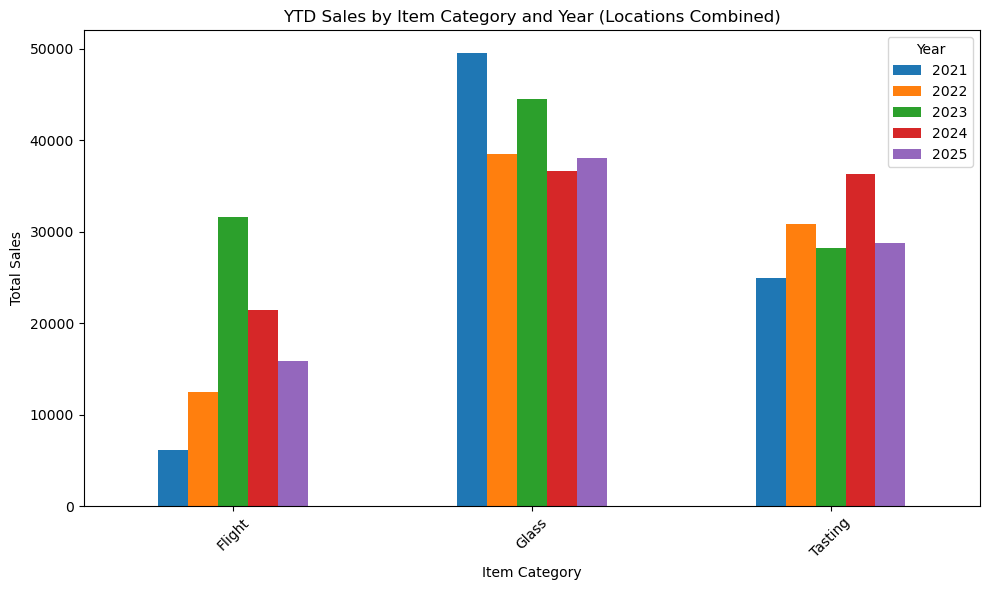

In [71]:
# Plot YTD Sales by Item Category by Year, Locations Combined
pivot_1.plot(kind='bar', figsize=(10, 6))
plt.title('YTD Sales by Item Category and Year (Locations Combined)')
plt.xlabel('Item Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

    Year              Location Item Category  Item Qty     Total
25  2025  Unionville Vineyards        Flight       472  10670.89
26  2025  Unionville Vineyards         Glass      1409  18528.63
27  2025  Unionville Vineyards       Tasting       795  27993.80
19  2024  Unionville Vineyards        Flight       588  13027.27
20  2024  Unionville Vineyards         Glass      1505  19518.84
21  2024  Unionville Vineyards       Tasting      1053  36080.99
13  2023  Unionville Vineyards        Flight       934  18205.89
14  2023  Unionville Vineyards         Glass      1409  19697.45
15  2023  Unionville Vineyards       Tasting      1065  28150.31
7   2022  Unionville Vineyards        Flight        63   1147.54
8   2022  Unionville Vineyards         Glass      1166  15749.63
9   2022  Unionville Vineyards       Tasting      1346  30881.26
2   2021  Unionville Vineyards         Glass      1154  14945.96
3   2021  Unionville Vineyards       Tasting      1299  25000.26


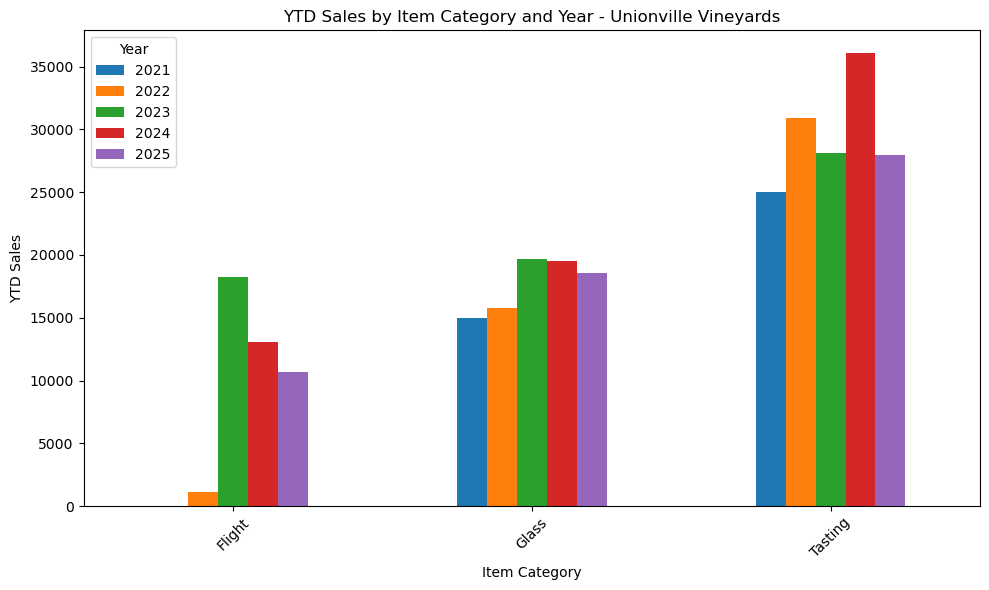

    Year      Location Item Category  Item Qty     Total
22  2025  Ferry Market        Flight       215   5171.22
23  2025  Ferry Market         Glass      1571  19564.99
24  2025  Ferry Market       Tasting        60    740.17
16  2024  Ferry Market        Flight       353   8372.18
17  2024  Ferry Market         Glass      1396  17186.10
18  2024  Ferry Market       Tasting         8    199.28
10  2023  Ferry Market        Flight       554  13442.48
11  2023  Ferry Market         Glass      2021  24876.83
12  2023  Ferry Market       Tasting         3     72.03
4   2022  Ferry Market        Flight       388  11349.09
5   2022  Ferry Market         Glass      1828  22736.63
6   2022  Ferry Market       Tasting         1      0.00
0   2021  Ferry Market        Flight       266   6147.96
1   2021  Ferry Market         Glass      2809  34617.22


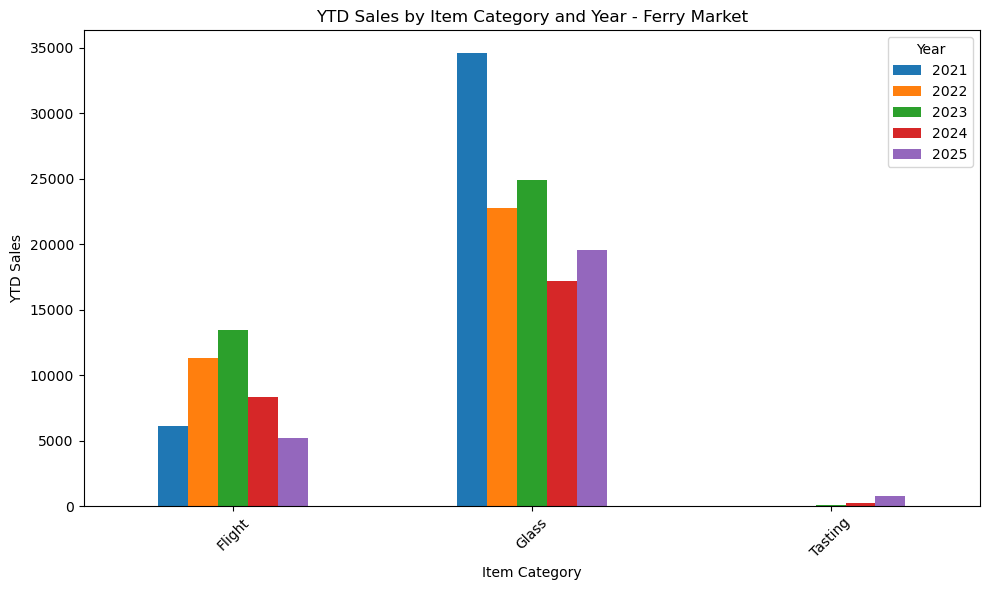

In [72]:
# Plot YTD Sales by Item Category and Year per Location
locations = sales_summary_df['Location'].unique()

for location in locations:
    location_df = sales_summary_df.loc[sales_summary_df['Location'] == location]
    print(location_df)
    pivot_2 = location_df.pivot_table(
        index='Item Category',
        columns='Year',
        values='Total',
        aggfunc='sum',
        fill_value=0
)

    pivot_2.plot(kind='bar', figsize=(10, 6))
    plt.title(f'YTD Sales by Item Category and Year - {location}')
    plt.xlabel('Item Category')
    plt.ylabel('YTD Sales')
    plt.xticks(rotation=45)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

In [73]:
pivot_3 = sales_summary_df.pivot_table(
    index='Item Category',
    columns='Year',
    values='Item Qty',
    aggfunc='sum',
    fill_value=0
)
pivot_3

Year,2021,2022,2023,2024,2025
Item Category,,,,,
Flight,266,451,1488,941,687
Glass,3963,2994,3430,2901,2980
Tasting,1299,1347,1068,1061,855


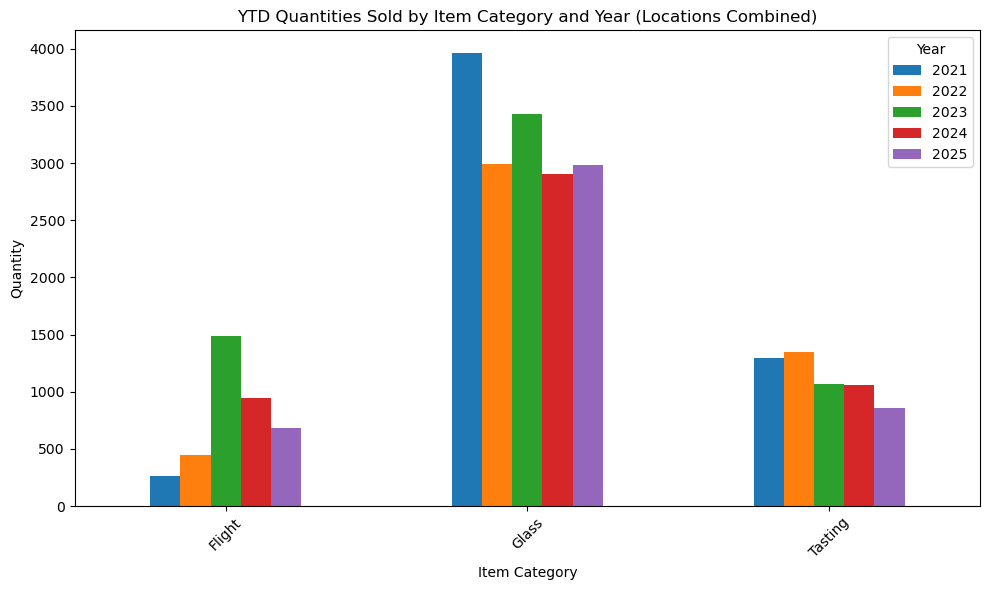

In [74]:
# Plot YTD Quantities Sold by Item Category and Year, Locations Combined
pivot_3.plot(kind='bar', figsize=(10, 6))
plt.title('YTD Quantities Sold by Item Category and Year (Locations Combined)')
plt.xlabel('Item Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

    Year              Location Item Category  Item Qty     Total
25  2025  Unionville Vineyards        Flight       472  10670.89
26  2025  Unionville Vineyards         Glass      1409  18528.63
27  2025  Unionville Vineyards       Tasting       795  27993.80
19  2024  Unionville Vineyards        Flight       588  13027.27
20  2024  Unionville Vineyards         Glass      1505  19518.84
21  2024  Unionville Vineyards       Tasting      1053  36080.99
13  2023  Unionville Vineyards        Flight       934  18205.89
14  2023  Unionville Vineyards         Glass      1409  19697.45
15  2023  Unionville Vineyards       Tasting      1065  28150.31
7   2022  Unionville Vineyards        Flight        63   1147.54
8   2022  Unionville Vineyards         Glass      1166  15749.63
9   2022  Unionville Vineyards       Tasting      1346  30881.26
2   2021  Unionville Vineyards         Glass      1154  14945.96
3   2021  Unionville Vineyards       Tasting      1299  25000.26


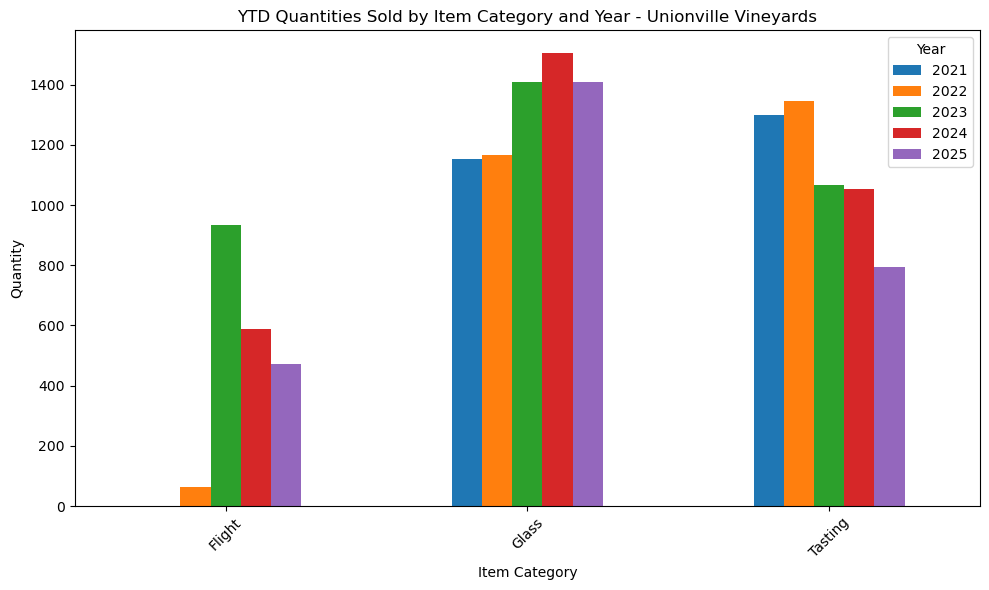

    Year      Location Item Category  Item Qty     Total
22  2025  Ferry Market        Flight       215   5171.22
23  2025  Ferry Market         Glass      1571  19564.99
24  2025  Ferry Market       Tasting        60    740.17
16  2024  Ferry Market        Flight       353   8372.18
17  2024  Ferry Market         Glass      1396  17186.10
18  2024  Ferry Market       Tasting         8    199.28
10  2023  Ferry Market        Flight       554  13442.48
11  2023  Ferry Market         Glass      2021  24876.83
12  2023  Ferry Market       Tasting         3     72.03
4   2022  Ferry Market        Flight       388  11349.09
5   2022  Ferry Market         Glass      1828  22736.63
6   2022  Ferry Market       Tasting         1      0.00
0   2021  Ferry Market        Flight       266   6147.96
1   2021  Ferry Market         Glass      2809  34617.22


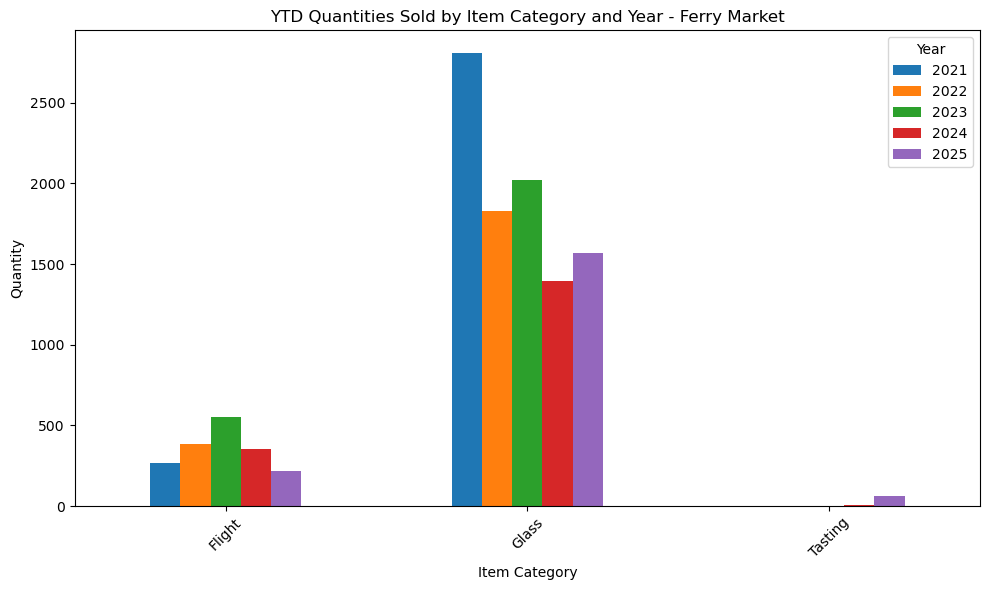

In [75]:
# Plot YTD Quantities Sold by Item Category and Year per Location

locations = sales_summary_df['Location'].unique()

for location in locations:
    location_df = sales_summary_df.loc[sales_summary_df['Location'] == location]
    print(location_df)
    pivot_4 = location_df.pivot_table(
        index='Item Category',
        columns='Year',
        values='Item Qty',
        aggfunc='sum',
        fill_value=0
)

    pivot_4.plot(kind='bar', figsize=(10, 6))
    plt.title(f'YTD Quantities Sold by Item Category and Year - {location}')
    plt.xlabel('Item Category')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()